In [44]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [45]:
# Load the dataset
file_path = r'C:\Users\Suliat\Documents\Dataset\Project Code\wustl-ehms-2020_with_attacks_categories.csv'
data = pd.read_csv(file_path)


In [46]:
data.describe()

,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,SrcGap,DstGap,SIntPkt,DIntPkt,SIntPktAct,...,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Label
count,16318.0,16318.000000,16318.000000,1.631800e+04,1.631800e+04,16318.0,16318.0,16318.000000,16318.000000,16318.000000,...,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000
mean,1111.0,496.650264,187.077706,2.118406e+05,7.102435e+04,0.0,0.0,10.946755,8.515423,1.286918,...,8156.308800,26.906815,97.808861,76.723741,142.846611,80.094190,75.443927,19.695551,0.258007,0.125383
std,0.0,28.584642,18.688525,7.942988e+04,4.530811e+04,0.0,0.0,101.230484,52.504560,62.123452,...,4709.735634,0.919766,1.496269,7.431914,8.493933,6.125289,6.609102,7.325856,0.103980,0.331163
min,1111.0,310.000000,120.000000,0.000000e+00,5.074470e+02,0.0,0.0,0.875000,0.730500,0.000000,...,1.000000,23.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000
25%,1111.0,496.000000,186.000000,1.990535e+05,6.635500e+04,0.0,0.0,3.792667,2.226000,0.000000,...,4077.250000,26.600000,98.000000,73.000000,142.000000,76.000000,73.000000,18.000000,0.200000,0.000000
50%,1111.0,496.000000,186.000000,2.366790e+05,7.889300e+04,0.0,0.0,4.191333,2.562250,0.000000,...,8156.500000,27.000000,98.000000,73.000000,144.000000,83.000000,73.000000,19.000000,0.300000,0.000000
75%,1111.0,496.000000,186.000000,2.615570e+05,8.719300e+04,0.0,0.0,4.984167,3.136375,0.000000,...,12234.750000,27.600000,98.000000,79.000000,148.000000,84.000000,79.000000,24.000000,0.300000,0.000000
max,1111.0,2298.000000,882.000000,1.134000e+06,3.938000e+06,0.0,0.0,9497.338000,2445.732000,3002.812000,...,16314.000000,29.200000,100.000000,194.000000,149.000000,95.000000,119.000000,73.000000,1.000000,1.000000


In [47]:
# Display the first few rows of the dataset and a summary of the data
data_head = data.head()
data_head, data_info


(     Dir        Flgs     SrcAddr     DstAddr  Sport  Dport  SrcBytes  \
 0     ->   e          10.0.1.172  10.0.1.150  58059   1111       496   
 1     ->   e          10.0.1.172  10.0.1.150  58062   1111       496   
 2     ->   e          10.0.1.172  10.0.1.150  58065   1111       496   
 3     ->   e          10.0.1.172  10.0.1.150  58067   1111       496   
 4     ->   e          10.0.1.172  10.0.1.150  58069   1111       496   
 
    DstBytes   SrcLoad  DstLoad  ...  Temp  SpO2  Pulse_Rate  SYS  DIA  \
 0       186  276914.0  92305.0  ...  28.9     0           0    0    0   
 1       186  230984.0  76995.0  ...  28.9     0           0    0    0   
 2       186  218470.0  72823.0  ...  28.9    89         104    0    0   
 3       186  203376.0  67792.0  ...  28.9    89         104    0    0   
 4       186  235723.0  78574.0  ...  28.9    89         101    0    0   
 
    Heart_rate  Resp_Rate   ST  Attack Category  Label  
 0           0          0  0.0           normal      0  


In [48]:
# Step 2: Validate Data Splitting
# Extract features and target
X = data.drop(columns=['Label'])
y = data['Label']

In [49]:
X

,Dir,Flgs,SrcAddr,DstAddr,Sport,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,...,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Attack Category
0,->,e,10.0.1.172,10.0.1.150,58059,1111,496,186,276914.0,92305.0,...,1,28.9,0,0,0,0,0,0,0.0,normal
1,->,e,10.0.1.172,10.0.1.150,58062,1111,496,186,230984.0,76995.0,...,2,28.9,0,0,0,0,78,17,0.4,normal
2,->,e,10.0.1.172,10.0.1.150,58065,1111,496,186,218470.0,72823.0,...,3,28.9,89,104,0,0,78,17,0.4,normal
3,->,e,10.0.1.172,10.0.1.150,58067,1111,496,186,203376.0,67792.0,...,4,28.9,89,104,0,0,79,17,0.4,normal
4,->,e,10.0.1.172,10.0.1.150,58069,1111,496,186,235723.0,78574.0,...,5,28.9,89,101,0,0,79,17,0.4,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16313,->,e,10.0.1.172,10.0.1.150,57348,1111,496,186,205128.0,68376.0,...,16310,27.7,98,73,148,84,73,19,0.3,normal
16314,->,e,10.0.1.172,10.0.1.150,63265,1111,496,186,274058.0,91353.0,...,16311,27.7,98,73,148,84,73,19,0.3,normal
16315,->,e,10.0.1.172,10.0.1.150,63918,1111,496,186,288568.0,96189.0,...,16312,23.6,98,73,148,84,73,19,0.3,normal
16316,->,e,10.0.1.172,10.0.1.150,52345,1111,496,186,237795.0,79265.0,...,16313,27.4,98,73,148,84,73,19,0.3,normal


In [50]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16313    0
16314    0
16315    0
16316    0
16317    0
Name: Label, Length: 16318, dtype: int64

In [51]:

# Identify categorical columns  for Network Feature
categorical_columns = ['Dir', 'Flgs', 'SrcAddr', 'DstAddr']

In [52]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])


In [53]:
# Apply the preprocessing steps to the data
X_processed = preprocessor.fit_transform(X)

In [54]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(gbm, X_processed, y, cv=5)

In [56]:
# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.3403799  0.93903186 0.94883578 0.84615385 0.93717438]
Mean cross-validation score: 0.8023151549157819


In [57]:
# Step 4: Model Evaluation
# Initialize the model with simpler parameters
gbm = GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.1)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [58]:
# Record the training time
start_time = time.time()
gbm.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

In [59]:
# Step 5: Evaluate the simplified model
# Predict on the test set
y_pred = gbm.predict(X_test)

In [60]:
# Verify the unique values in y_test
print("Unique values in y_test:", y_test.unique())

Unique values in y_test: [0 1]


In [61]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Update pos_label based on unique values in y_test
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, gbm_simplified.predict_proba(X_test)[:, 1])


In [62]:
# Print evaluation metrics
print(f"Training time: {training_time:.2f} seconds")
print(f"accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Training time: 7.62 seconds
accuracy: 0.9518995098039216
Precision: 0.9960629921259843
Recall: 0.6185819070904646
F1-Score: 0.7631975867269984
ROC-AUC Score: 0.949837928568676


In [63]:
# Confusion Matrix
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])

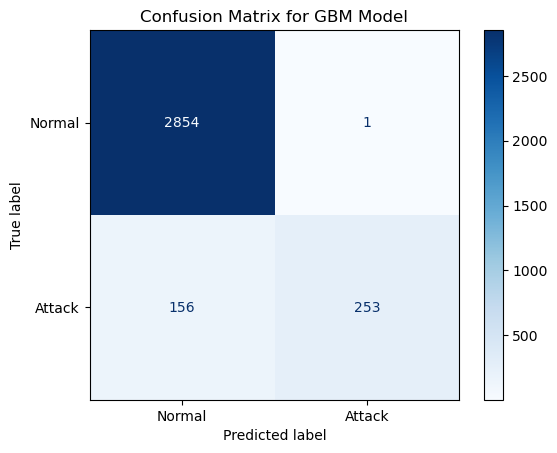

In [64]:
# Plot the GBM confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for GBM Model")
plt.show()


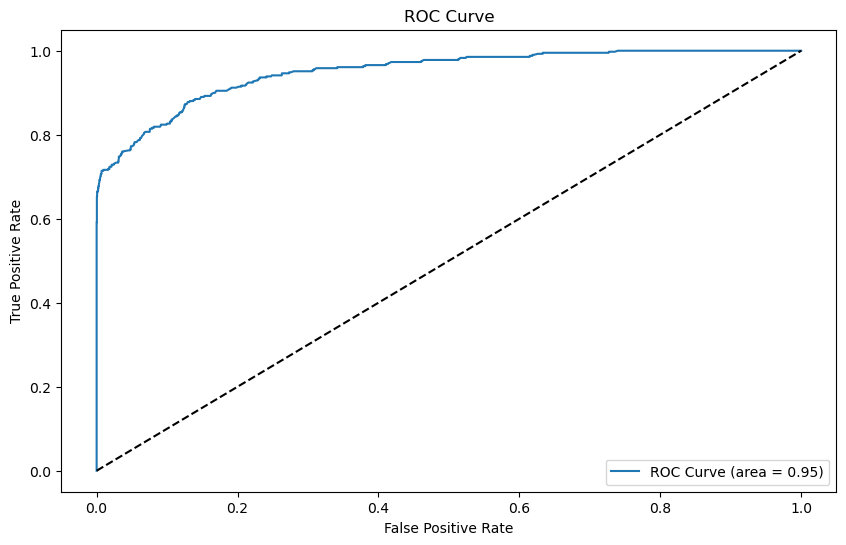

In [65]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, gbm_simplified.predict_proba(X_test)[:, 1], pos_label=1)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


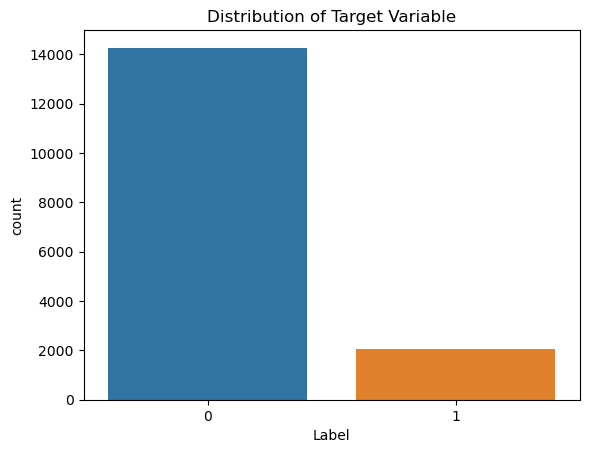

In [66]:
# Step 6: Examine Data
# Visualize the distribution of the target variable
sns.countplot(x=y)
plt.title("Distribution of Target Variable")
plt.show()

C:\Users\Suliat\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


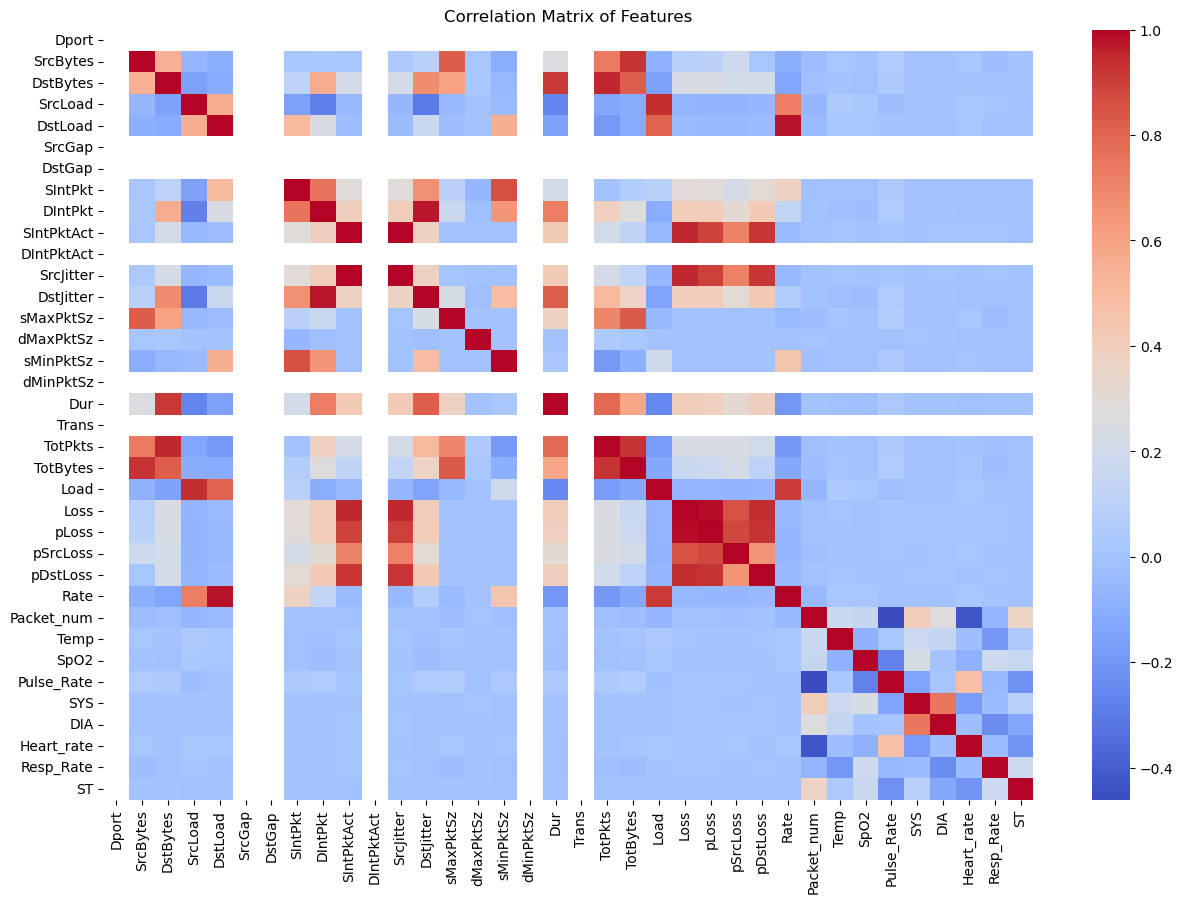

In [67]:
# Check for correlations between features (excluding categorical columns)
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = X[numeric_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

In [68]:
# Feature Importances
importances = gbm_simplified.feature_importances_
features = (preprocessor.named_transformers_['num'].feature_names_in_.tolist() + 
            preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist())

In [69]:
# Create a DataFrame for the feature importances
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

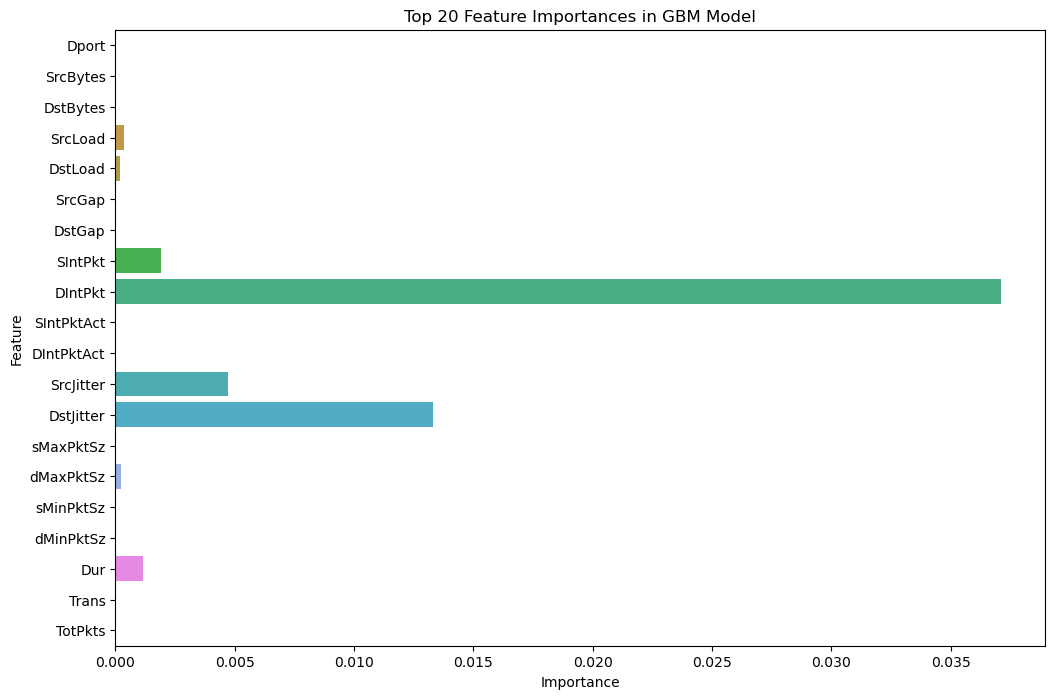

In [70]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(20))
plt.title("Top 20 Feature Importances in GBM Model")
plt.show()
